1. Capture a 10 sec video footage using a camera of your choice. The footage should be taken
with the camera in hand and you need to pan the camera slightly from left-right or right-left
during the 10 sec duration. For all the images, operate at grayscale

In [3]:
import cv2 as cv
vidcap = cv.VideoCapture(r'/Users/priyankashanker/Desktop/cv/video.mp4')
check,image = vidcap.read()
count = 0
inc=0
while check:
    check,image = vidcap.read()
    if count%30==0 : #As i have taken a video in 30fps so i am storing one image from each frame.
      inc+=1
      image=cv.flip(image,0)
      cv.imwrite(r"/Users/priyankashanker/Desktop/cv\data\frame%d.jpg" % inc, image)         
    count += 1
print(count)

389


1 a. Pick any image frame from the 10 sec video footage. Find the boundary of any object
in the scene. You can pick regular shapes. You must show usage of Harris corner and Canny
edge detection function.

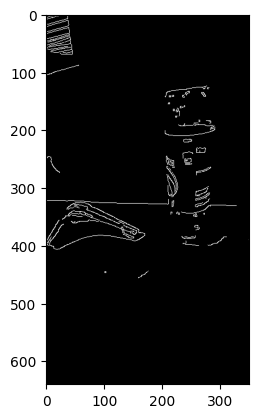

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'/Users/priyankashanker/Desktop/cv\data\frame7.jpg',0)
edges = cv.Canny(img,100,200)
plt.imshow(edges,cmap='gray')

Here I have cropped the water bottle object in an image and applied canny edge detection.

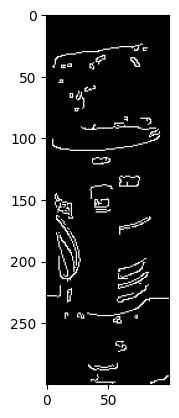

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'/Users/priyankashanker/Desktop/cv\data\frame7.jpg',0)
img1=img[100:400,200:300]
edges = cv.Canny(img1,100,200)
plt.imshow(edges,cmap='gray')

Using Harris Corner Detection

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
filename = r'/Users/priyankashanker/Desktop/cv\data\frame7.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.07)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
#cv.imshow('dst',img)
cv.imwrite('/Users/priyankashanker/Desktop/cv\data\detect_corner.jpg',img)


True

1 b. Pick another image frame from the set which also has the same object in view. Find all
corresponding points of the object under consideration between these two images. Find the
homography matrix between the images.

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread(r'/Users/priyankashanker/Desktop/cv\data\frame5.jpg',0)  
img2 = cv.imread(r'/Users/priyankashanker/Desktop/cv\data\frame1.jpg',0)
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [12]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Homography Matrix")
    print(M)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Homography Matrix
[[ 7.32893587e-01  1.10427957e-01 -8.53335591e+01]
 [-5.18867587e-02  6.21454632e-01  1.05923866e+02]
 [-1.38550148e-05 -4.18189411e-04  1.00000000e+00]]


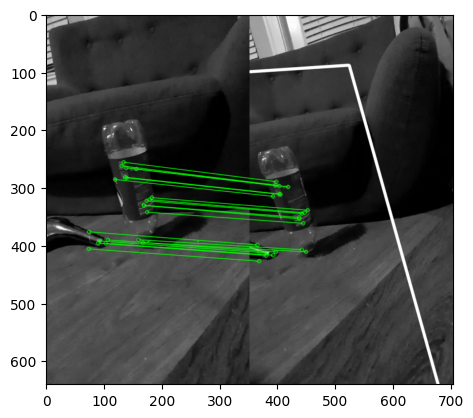

In [13]:
draw_params = dict(matchColor = (0,255,0), 
                   singlePointColor = None,
                   matchesMask = matchesMask, 
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv.imwrite(r'/Users/priyankashanker/Desktop/cv\data\matching_between_2_frames.jpg',img3)
plt.imshow(img3, 'gray')
#plt.show()

2. Implement the image stitching application in MATLAB (not necessary to be real-time). Test
your application for any FIVE of a set of 3 image-set available in the gsu_building_database.
That is, your stitching application should stitch 3 images. You must test the performance of your
application for FIVE such sets.

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import cv2
def pan_stich(image_paths,output_loc):

    #image_paths=[r'E:\GSU\CV\Assignment_2\pics\classroom_south2.jpg',r'E:\GSU\CV\Assignment_2\pics\classroom_south3.jpg',r'E:\GSU\CV\Assignment_2\pics\classroom_south4.jpg']
    # initialized a list of images
    imgs = []

    for i in range(len(image_paths)):
        imgs.append(cv2.imread(image_paths[i]))
        imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)

    stitchy=cv2.Stitcher.create()
    (dummy,output)=stitchy.stitch(imgs)

    if dummy != cv2.STITCHER_OK:
        print("stitching ain't successful")
    else:
        print('Your Panorama is ready!!!')

    # final output
    cv2.imwrite(output_loc+'/out.jpg',output)


In [16]:
loc=r'/Users/priyankashanker/Desktop/cv'
image_paths=['/Users/priyankashanker/Desktop/cv/b1.jpg','/Users/priyankashanker/Desktop/cv/b2.jpg','/Users/priyankashanker/Desktop/cv/b3.jpg']
image_dest=r'/Users/priyankashanker/Desktop/cv'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [17]:
loc=r'/Users/priyankashanker/Desktop/cv'
image_paths=['/Users/priyankashanker/Desktop/cv/d1.jpg','/Users/priyankashanker/Desktop/cv/d2.jpg','/Users/priyankashanker/Desktop/cv/d3.jpg']
image_dest=r'/Users/priyankashanker/Desktop/cv'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [18]:
loc=r'/Users/priyankashanker/Desktop/cv'
image_paths=['/Users/priyankashanker/Desktop/cv/l1.jpeg','/Users/priyankashanker/Desktop/cv/l2.jpeg','/Users/priyankashanker/Desktop/cv/l3.jpeg']
image_dest=r'/Users/priyankashanker/Desktop/cv'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [19]:
loc=r'/Users/priyankashanker/Desktop/cv'
image_paths=['/Users/priyankashanker/Desktop/cv/s1.jpg','/Users/priyankashanker/Desktop/cv/s2.jpg','/Users/priyankashanker/Desktop/cv/s3.jpg']
image_dest=r'/Users/priyankashanker/Desktop/cv'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [20]:
loc=r'/Users/priyankashanker/Desktop/cv'
image_paths=['/Users/priyankashanker/Desktop/cv/s1.jpg','/Users/priyankashanker/Desktop/cv/s2.jpg','/Users/priyankashanker/Desktop/cv/s3.jpg']
image_dest=r'/Users/priyankashanker/Desktop/cv'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


3. Implement an application that will compute and display the INTEGRAL image feed along with
the stereo and RGB feed. You cannot use a built-in function such as
“output = integral_image(input)”

In [23]:
import cv2
import depthai as dai
import numpy as np
from copy import deepcopy

In [29]:
pip install depthai


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
img = cv2.imread(r'/Users/priyankashanker/Desktop/cv\data\frame7.jpg')
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialising to 0
intergal_img = [[0 for j in range(len(img_bw[0]))] for i in range(len(img_bw))]

# compying values form img array
for i in range(len(img_bw)):
    for j in range(len(img_bw[0])):
        intergal_img[i][j] = int(img_bw[i][j])

# calculating the integral img
for i in range(1, len(img_bw[0])):
    intergal_img[0][i] += intergal_img[0][i-1] 

for j in range(1, len(img_bw)):
    intergal_img[j][0] += intergal_img[j-1][0]
    
for i in range(1, len(img_bw)):
    for j in range(1, len(img_bw[0])):
        intergal_img[i][j] = intergal_img[i-1][j] + intergal_img[i][j-1] - intergal_img[i-1][j-1] + img_bw[i][j]
        


In [25]:
# saving integral image in file

a = np.array(intergal_img)
mat = np.matrix(a)

with open('integral_matrix.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt="%d")

4. Implement the image stitching, for at least 1 pair of images. Use SIFT features. If using Depth
AI API this should function in real-time. You can use built-in libraries/tools provided by the
DepthAI API.
If available, you can also simply call any built-in function “image_stitch(image1, image1)”.
However, in that case, you need to show a 180 or 360degree panoramic output.

In [26]:
import cv2
import numpy as np
import sys

class Image_Stitching():
    def __init__(self,soro) :
        self.ratio=0.85
        self.min_match=10
        if soro=="SIFT":
          print("ok")
          self.soro=cv2.SIFT_create()
        else:
          self.soro=cv2.ORB_create()
        self.smoothing_window_size=800

    def registration(self,img1,img2):
        kp1, des1 = self.soro.detectAndCompute(img1, None)
        kp2, des2 = self.soro.detectAndCompute(img2, None)
        matcher = cv2.BFMatcher()
        raw_matches = matcher.knnMatch(des1, des2, k=2)
        good_points = []
        good_matches=[]
        for m1, m2 in raw_matches:
            if m1.distance < self.ratio * m2.distance:
                good_points.append((m1.trainIdx, m1.queryIdx))
                good_matches.append([m1])
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
        cv2.imwrite('matching.jpg', img3)
        if len(good_points) > self.min_match:
            image1_kp = np.float32(
                [kp1[i].pt for (_, i) in good_points])
            image2_kp = np.float32(
                [kp2[i].pt for (i, _) in good_points])
            H, status = cv2.findHomography(image2_kp, image1_kp, cv2.RANSAC,5.0)
        return H

    def create_mask(self,img1,img2,version):
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2
        offset = int(self.smoothing_window_size / 2)
        barrier = img1.shape[1] - int(self.smoothing_window_size / 2)
        mask = np.zeros((height_panorama, width_panorama))
        if version== 'left_image':
            mask[:, barrier - offset:barrier + offset ] = np.tile(np.linspace(1, 0, 2 * offset ).T, (height_panorama, 1))
            mask[:, :barrier - offset] = 1
        else:
            mask[:, barrier - offset :barrier + offset ] = np.tile(np.linspace(0, 1, 2 * offset ).T, (height_panorama, 1))
            mask[:, barrier + offset:] = 1
        return cv2.merge([mask, mask, mask])

    def blending(self,img1,img2):
        H = self.registration(img1,img2)
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2

        panorama1 = np.zeros((height_panorama, width_panorama, 3))
        mask1 = self.create_mask(img1,img2,version='left_image')
        panorama1[0:img1.shape[0], 0:img1.shape[1], :] = img1
        panorama1 *= mask1
        mask2 = self.create_mask(img1,img2,version='right_image')
        panorama2 = cv2.warpPerspective(img2, H, (width_panorama, height_panorama))*mask2
        result=panorama1+panorama2

        rows, cols = np.where(result[:, :, 0] != 0)
        min_row, max_row = min(rows), max(rows) + 1
        min_col, max_col = min(cols), max(cols) + 1
        final_result = result[min_row:max_row, min_col:max_col, :]
        return final_result

In [27]:
img1 = cv2.imread(r'/Users/priyankashanker/Desktop/cv/a1.jpg')
img2 = cv2.imread(r'/Users/priyankashanker/Desktop/cv/a2.jpg')
final=Image_Stitching("SIFT").blending(img1,img2)
cv2.imwrite(r'/Users/priyankashanker/Desktop/cv/paranoma.jpg', final)

ok


True

In [ ]:
5. Repeat (4) using ORB features.
You can make assumptions as necessary, however, justify them in your answers/description.

In [28]:
img1 = cv2.imread(r'/Users/priyankashanker/Desktop/cv/a1.jpg')
img2 = cv2.imread(r'/Users/priyankashanker/Desktop/cv/a2.jpg')
final=Image_Stitching("ORB").blending(img1,img2)
cv2.imwrite(r'/Users/priyankashanker/Desktop/cv/paranoma.jpg', final)

True